In [1]:
import cv2
import skimage.io as si
import matplotlib.pyplot as plt

In this kernel, we will discuss on the next 3 problems in the topic `changing color-space`
- **Problem 1.** Convert color from `BGR` to `RGB` modes using `OpenCV` and `without OpenCV`
- **Problem 2.** Interchange `channel-order` of an image.
- **Problem 3.** Spliting & combining `pixel-channel`

## 1. `BGR` <=> `RGB` converting.
$\qquad \diamond$ Firstly, loading (in `OpenCV` and `skimage`) & display the image in `matplotlib`

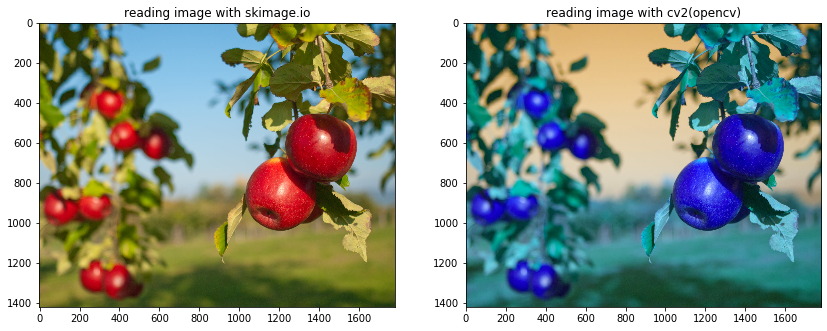

In [2]:
path = r"C:\Users\Admin\Desktop\apple.jpg"
cv_img = cv2.imread(path)
si_img = si.imread(path)

plt.figure(figsize = (14, 8))
plt.subplot(1,2,1); plt.imshow(si_img); plt.title('reading image with skimage.io')
plt.subplot(1,2,2); plt.imshow(cv_img); plt.title('reading image with cv2(opencv)')
plt.show()

$\qquad \diamond$ To get the `true-color` in `matplotlib` when loading by `OpenCV` without using available function, we must exchange 1st channel to 3rd channel to obtain the true-order of channel.

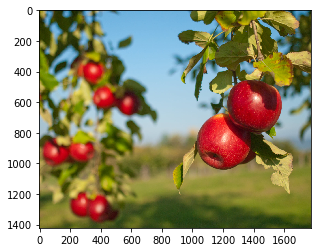

In [3]:
true_img = cv_img.copy()
true_img[:,:,2] = cv_img[:,:,0]
true_img[:,:,0] = cv_img[:,:,2]
plt.imshow(true_img);

$\qquad \diamond$ To get the `true-color` by `OpenCV`, you can use the function `cv2.cvtColor()` with the second argument `cv2.COLOR_RGB2BGR`

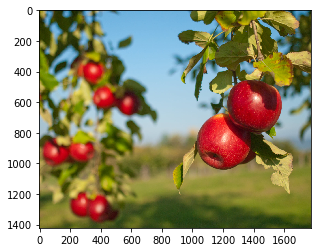

In [4]:
true_cv_img = cv2.cvtColor(cv_img, cv2.COLOR_RGB2BGR)
plt.imshow(true_cv_img);

$\qquad \diamond$ Finally, checking `true_img` and `true_cv_img` is **point-wise equal equality**

In [5]:
import numpy as np
print(np.array_equal(true_img, true_cv_img))

True


## 2. Interchange order-channels
In this part, we will consider another picture,

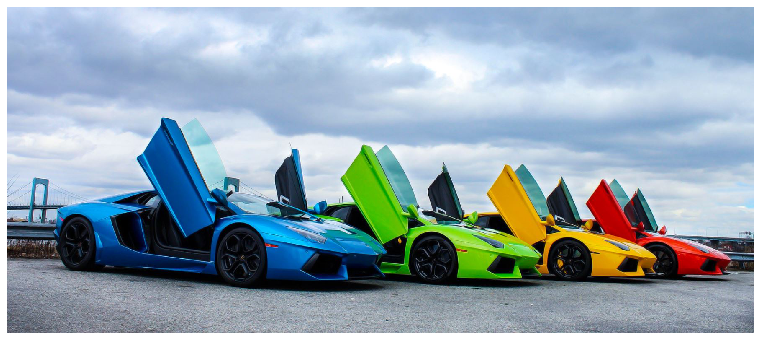

In [6]:
path = r"C:\Users\Admin\Desktop\car.png"
img = si.imread(path)
plt.figure(figsize = (15, 6))
plt.imshow(img)
plt.axis("off")
plt.show()

### 2.1. `RGB` to `RBG`
$\qquad$ Hence, in this case, we will interchange the 2 last channels `green` and `blue`,

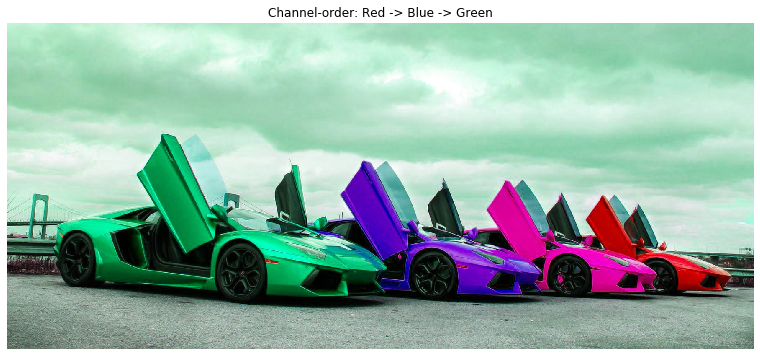

In [7]:
red_ch = img[:, :, 0]
green_ch = img[:, :, 1]
blue_ch = img[:, :, 2]

image = img.copy()
image[:,:,0] = red_ch
image[:,:,1] = blue_ch
image[:,:,2] = green_ch
plt.figure(figsize = (15, 6))
plt.imshow(image)
plt.title("Channel-order: Red -> Blue -> Green")
plt.axis("off")
plt.show()

### 2.2. `RGB` to `GBR`

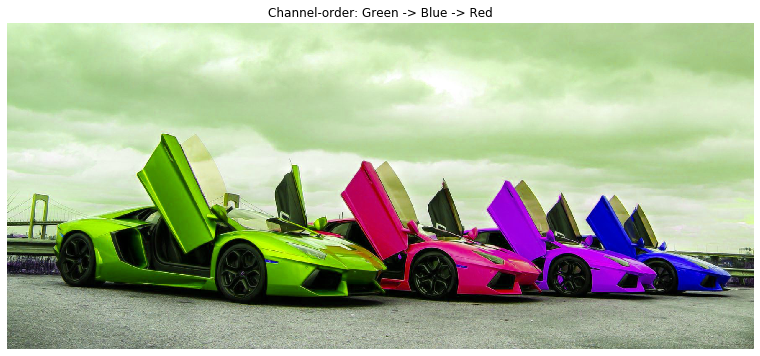

In [8]:
image = img.copy()
image[:,:,0] = green_ch
image[:,:,1] = blue_ch
image[:,:,2] = red_ch
plt.figure(figsize = (15, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Channel-order: Green -> Blue -> Red")
plt.show()

$\qquad$ **Comments.**

$\qquad \qquad \diamond$ We can see that the behind-idea to change the order-channel is spliting the original in to 3 discrete-channels then put them into the new order.

$\qquad \qquad \diamond$ By this way, we can change the order of channel but this is take a lots of time to complete if we want to display more than 3 new orders. I will give the solution in the next part: `Spliting & combining channel using OpenCV`.

## 3. Spliting&combining channels
$\qquad \diamond$ In `OpenCV`, we can simplify the preceding technique by using function `cv2.split` then merge these channels to the new-order with `cv2.merge()`.

$\qquad \diamond$ **`c1,c2,c3 = cv2.split(image)`**: Split the `image` into 3 channels `c1, c2, c3` respectively.

$\qquad \diamond$ **`cv2.merge((new order of c1,c2,c3 channels))`**: Combine them together with the new `channel-order`.

(-0.5, 1784.5, 779.5, -0.5)

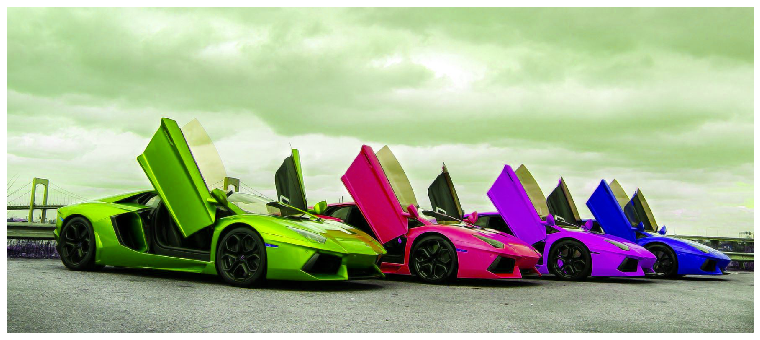

In [9]:
r, g, b = cv2.split(img)
plt.figure(figsize = (14, 6))
gbr = cv2.merge((g, b, r))
plt.imshow(gbr)
plt.axis("off")

$\quad \bullet$ Finally, I will display 6 `orders` created from `Red (R)`, `green (G)`, `blue (B)`:

                                    {RGB (org.), RBG, BRG, BGR, GRB, GBR}

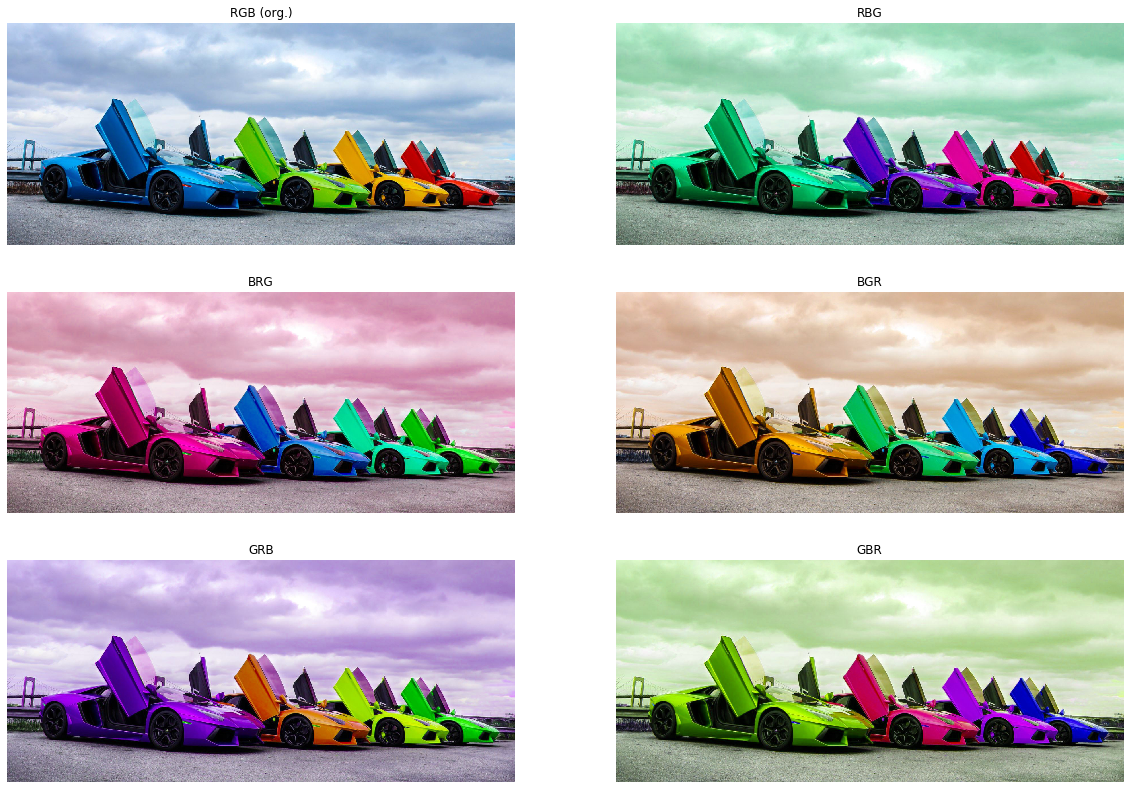

In [10]:
images = [cv2.merge((r, g, b)), cv2.merge((r, b, g)), cv2.merge((b, r, g)), 
          cv2.merge((b, g, r)), cv2.merge((g, r, b)), cv2.merge((g, b, r))]
titles = ['RGB (org.)', 'RBG', 'BRG', 'BGR', 'GRB', 'GBR']
plt.figure(figsize = (20, 14))
for k in range(6):
    plt.subplot(3, 2, k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    plt.axis("off")